## **This file contains further implementation of Combining static dynamic features using Autoencoder**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
import tensorflow.keras as keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv("./soil_data.csv")
data

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,...,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,...,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,...,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [ ]:
train_data = pd.read_csv("./train_timeseries.csv")
train_data

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300675,56043,2016-12-27,0.16,82.88,1.63,-7.97,-13.49,-12.81,-1.39,-13.60,...,-9.41,5.90,7.63,3.61,4.02,8.58,10.39,5.92,4.47,0.0
19300676,56043,2016-12-28,0.02,83.33,1.41,-8.71,-14.10,-13.84,-2.49,-13.56,...,-10.55,6.50,11.43,4.11,7.32,9.92,14.49,7.26,7.22,NaN
19300677,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,-10.29,4.29,6.24,2.03,4.22,6.56,10.07,3.20,6.87,NaN
19300678,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,-4.14,4.98,7.34,1.99,5.35,7.28,10.12,3.24,6.89,NaN


In [ ]:
train_data = train_data[train_data['date'] <= '2012-12-31']

In [ ]:
result = pd.merge(train_data, data, on='fips', how='inner')

In [ ]:
result

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14759887,56043,2012-12-27,1.33,82.23,1.76,-8.43,-11.79,-11.67,-4.52,-10.35,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
14759888,56043,2012-12-28,0.08,82.80,1.53,-8.00,-13.29,-13.07,-1.95,-11.53,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
14759889,56043,2012-12-29,0.01,82.92,1.29,-10.03,-15.05,-14.77,-3.07,-15.59,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1
14759890,56043,2012-12-30,0.02,82.83,1.37,-9.48,-14.42,-14.16,-2.66,-13.37,...,0.000000,0.000000,0.000000,1,1,1,1,1,1,1


In [ ]:
result =  result.drop(['score'], axis=1)

In [ ]:
train = result[(result['date'] >= '2000-01-01') & (result['date'] <= '2008-12-31')]
validation = result[(result['date'] >= '2009-01-01') & (result['date'] <= '2010-12-31')]
test = result[(result['date'] >= '2011-01-01') & (result['date'] <= '2012-12-31')]

In [ ]:
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
y_train = train['PRECTOT']
y_train

0            0.22
1            0.20
2            3.65
3           15.95
4            0.00
            ...  
10219099     0.70
10219100     0.28
10219101     0.36
10219102     1.08
10219103     0.54
Name: PRECTOT, Length: 10219104, dtype: float64

In [ ]:
y_valid = validation['PRECTOT']
y_valid

0           0.01
1           2.71
2           9.09
3           6.31
4          18.56
           ...  
2268835     0.00
2268836     0.03
2268837     1.26
2268838     3.67
2268839     0.77
Name: PRECTOT, Length: 2268840, dtype: float64

In [ ]:
y_test = test['PRECTOT']
y_test

0          40.22
1           0.02
2           0.00
3           0.05
4           4.24
           ...  
2271943     1.33
2271944     0.08
2271945     0.01
2271946     0.02
2271947     0.01
Name: PRECTOT, Length: 2271948, dtype: float64

In [ ]:
train_combined = pd.read_csv("./train_combined.csv")
train_combined

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,10,11,12,13,14,15,16,17,18,19
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,14.521126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.184565
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,16.497710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.192181
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,18.322374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.108471
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,11.236746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.846046
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,2.944411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.320692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219099,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.451045
10219100,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.133389
10219101,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.065495
10219102,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.723710


In [ ]:
validation_combined = pd.read_csv("./validation_combined.csv")
validation_combined

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,10,11,12,13,14,15,16,17,18,19
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,3.435192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.071623
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,9.249921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.346355
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,15.103436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.068015
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,15.277278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.087820
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,16.020477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.079616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268835,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.538682
2268836,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.421394
2268837,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301843
2268838,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.725154


In [ ]:
test_combined = pd.read_csv("./test_combined.csv")
test_combined

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,10,11,12,13,14,15,16,17,18,19
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,12.924228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.257389
1,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,3.242168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.217979
2,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,0.985612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.391076
3,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,4.812413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.167752
4,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,0.0,6.386332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.514565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.403797
2271944,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.544276
2271945,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.603718
2271946,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.583138


In [ ]:
#Define function for plotting loss
def plot_loss(history, model_name):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch

    fig, ax = plt.subplots(2,1, figsize=(12,8))

    # Plot training loss
    ax[0].semilogy(model_history['epoch'], model_history['loss'], label='Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f'{model_name} Training Loss')
    ax[0].legend()

    # Plot validation loss
    ax[1].semilogy(model_history['epoch'], model_history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title(f'{model_name} Validation Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
train_combined.shape[1]

52

In [ ]:
static_input_dim = train_combined.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(static_input_dim,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Print the model summary
model.summary()

# Define the EarlyStopping and ModelCheckpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=6)
#checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
history = model.fit(train_combined, y_train, epochs=20, batch_size=8, validation_data=(validation_combined, y_valid), callbacks=early_stop)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3392      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1277388/1277388 [==============================] - 2561s 2ms/step - loss: 2.9706 - val_loss: 2.7907
Epoch 2/20
1277388/1277388 [==============================] - 2486s 2ms/step - loss: 2.5658 - val_loss: 2.7900
Epoch 3/20
1277388/1277388 [==============================] - 2439s 2ms/step - loss: 2.5659 - va

In [ ]:
# Evaluate the model
test_loss = model.evaluate(test_combined, y_test)
print(f'Test loss: {test_loss}')

70999/70999 [==============================] - 144s 2ms/step - loss: 2.4902
Test loss: 2.4901936054229736


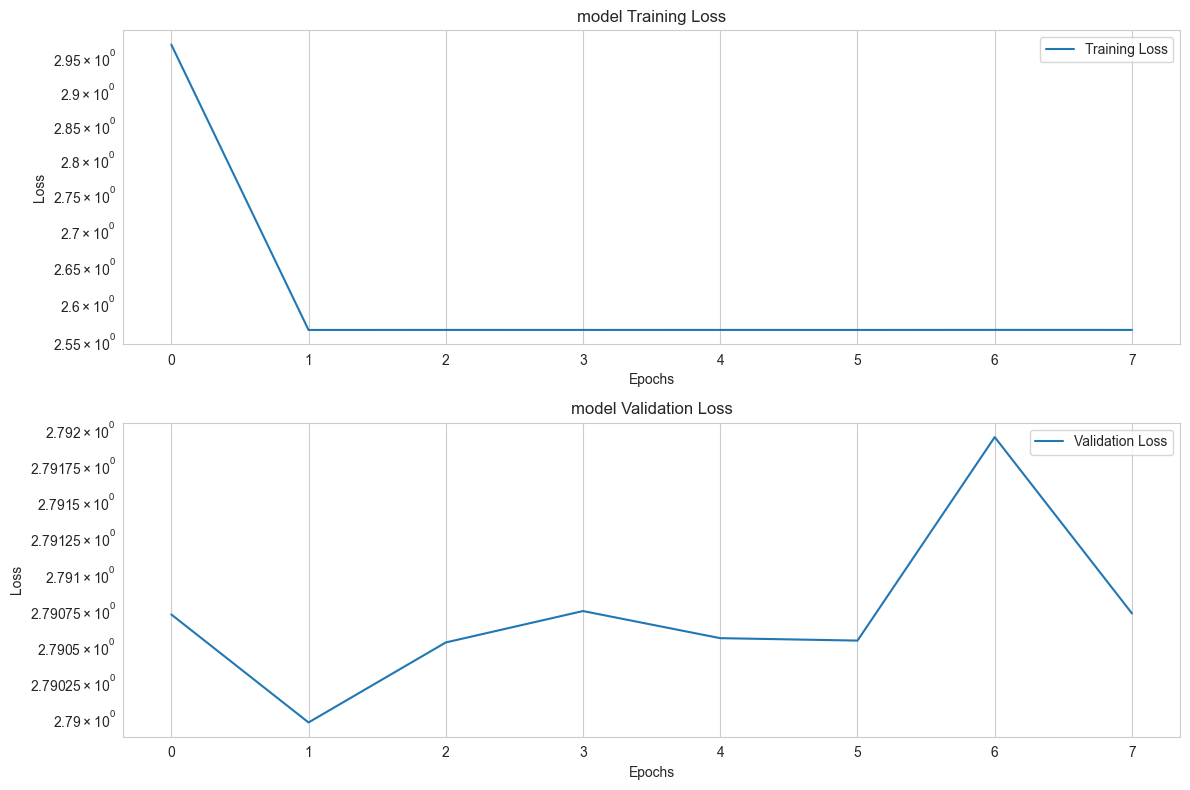

In [ ]:
plot_loss(history, 'model')

In [ ]:
y_pred = model.predict(test_combined)

70999/70999 [==============================] - 91s 1ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

2.4902003508024517

In [ ]:
abs_error = np.abs(y_test - y_pred.flatten())

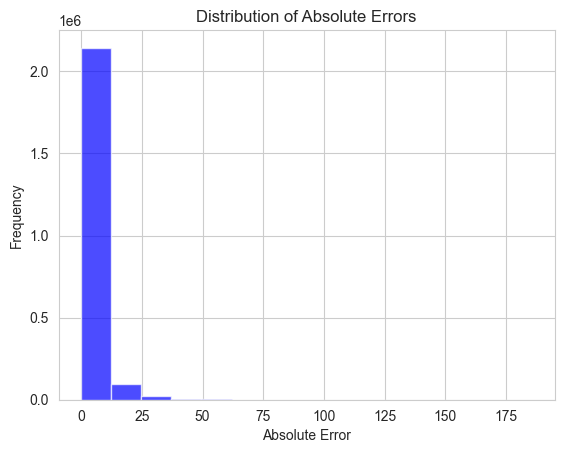

In [ ]:
plt.hist(abs_error, bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

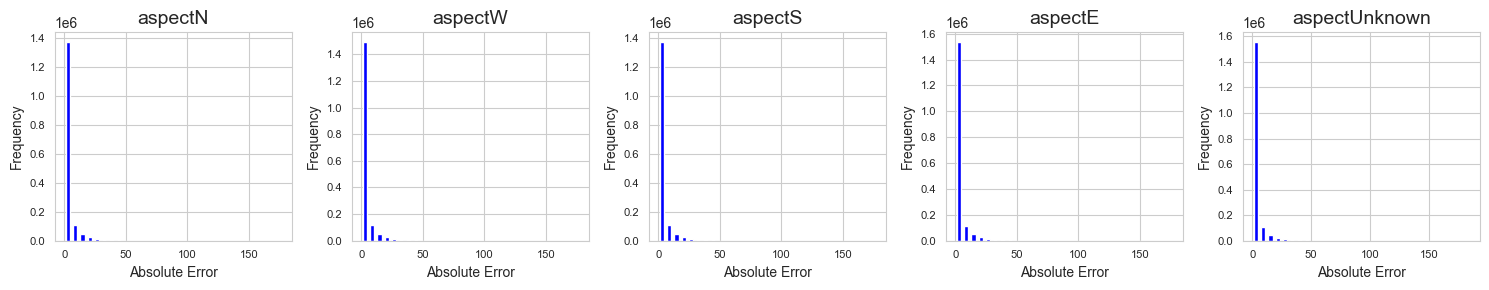

In [ ]:
region_columns = ['aspectN', 'aspectW', 'aspectS', 'aspectE', 'aspectUnknown']

threshold = 0.1

fig, axes = plt.subplots(nrows=1, ncols=len(region_columns), figsize=(15, 3))
axes = axes.flatten()

for i, region in enumerate(region_columns):
    idx = test_combined[region] > threshold
    region_indices = test_combined[idx].index

    if idx.sum() == 0 or np.isnan(abs_error[region_indices]).all():
        axes[i].set_title(f"{region} - No Data", fontsize=14)
        continue

    axes[i].hist(abs_error[region_indices], bins=30, histtype="barstacked", color="blue", rwidth=0.6, edgecolor="white")
    axes[i].set_title(f"{region}", fontsize=14)
    axes[i].set_xlabel("Absolute Error", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

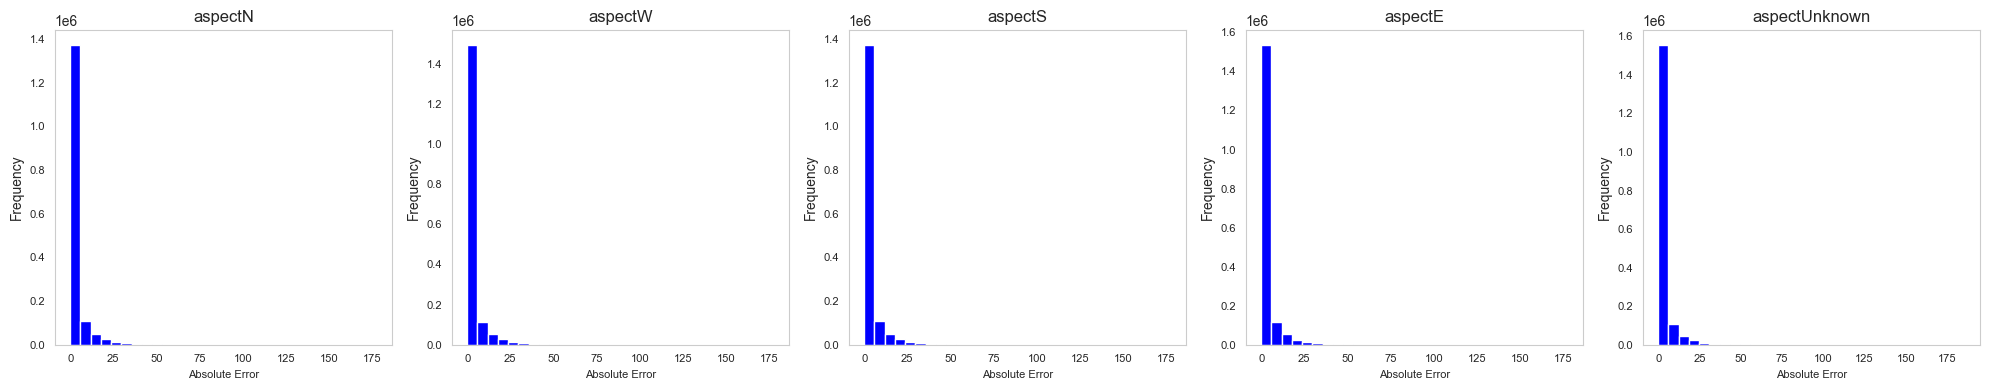

In [ ]:
region_columns = ['aspectN', 'aspectW', 'aspectS', 'aspectE', 'aspectUnknown']

threshold = 0.1

fig, axes = plt.subplots(nrows=1, ncols=len(region_columns), figsize=(20, 4))
axes = axes.flatten()

for i, region in enumerate(region_columns):
    idx = test_combined[region] > threshold
    region_indices = test_combined[idx].index

    if idx.sum() == 0 or np.isnan(abs_error[region_indices]).all():
        axes[i].set_title(f"{region} - No Data", fontsize=14)
        axes[i].grid(False)
        continue

    axes[i].hist(abs_error[region_indices], bins=30, histtype="barstacked", color="blue", edgecolor="white")
    axes[i].set_title(f"{region}", fontsize=12)
    axes[i].set_xlabel("Absolute Error", fontsize=8)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].grid(False)

plt.tight_layout()
plt.show()